In [2]:
import shapefile
from pyproj import Proj, transform
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon
import sys
sys.path.append('../parsing')
import accessDB as db
%matplotlib inline

# data from https://city.milwaukee.gov/DownloadMapData3497.htm
# it is encoded in NAD27 in zone 4803 (Wisconsin South)

In [3]:
# open a single file
#f = open('ald2012.shp', 'rb')
#sf = shapefile.Reader(shp=f)

# load in maps
ald = shapefile.Reader('ald2016/alderman')
nbh = shapefile.Reader('hoods/neighborhood')
pol = shapefile.Reader('poldist/poldist')
ward = shapefile.Reader('wards/ward')
city = shapefile.Reader('corp/citylimit')

In [4]:
# converter for coordinates
inProj = Proj(init='EPSG:32054', preserve_units=True) # NAD27 Wisconsin South
outProj = Proj(proj='latlong', datum='WGS84', ellps='WGS84') # Latitude and Longitude

In [15]:
def drawOne(sf, n):
    # initialize plot size
    plt.figure(figsize=(5,9)) # approx dimensions of MKE is 5:9
    # limit bounds of the plot
    plt.xlim(-88.1,-87.85)
    plt.ylim(42.9,43.2)
    m = plt

    shape = sf.shapes()[n]
    xs = []
    ys = []

    # loop through points
    for point in shape.points:
        # parse points
        coord = [float('%.3f' % coord) for coord in point]
        # convert points
        x, y = transform(inProj, outProj, coord[0], coord[1])
        # add to list
        xs.append(x)
        ys.append(y)

    # plot shape
    m.plot(xs, ys, '-')

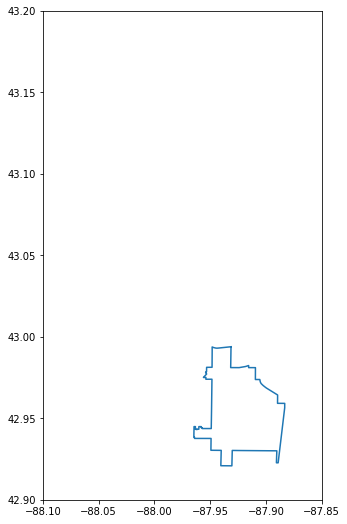

In [30]:
drawOne(ald, 14)